From the fitbit_sleep_quality notebook, we found that the model's accuracy and precision is about 66% (a little better from guessing).

I think more training data can be used to improve the accuracy of the model. Thus, I found another data that can be used.

# Data Loading

Note: I could not find data dictionary of this dataset.

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./data/fitbit_fitabase/daily_fitbit_sema_df_unprocessed.csv')
df

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7406,7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7407,7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7408,7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [274]:
df.isna().sum()

Unnamed: 0                0
id                        0
date                      0
nightly_temperature    4051
nremhr                 4935
                       ... 
HOME_OFFICE            5120
OTHER                  5120
OUTDOORS               5120
TRANSIT                5120
WORK/SCHOOL            5120
Length: 63, dtype: int64

# Data Exploration

In [275]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'nightly_temperature', 'nremhr', 'rmssd',
       'spo2', 'full_sleep_breathing_rate', 'stress_score',
       'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'badgeType', 'calories', 'filteredDemographicVO2Max', 'distance',
       'activityType', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'mindfulness_session', 'scl_avg', 'resting_hr', 'sleep_duration',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'step_goal', 'min_goal', 'max_goal', 'step_goal_label',
       'ALERT',

<AxesSubplot: >

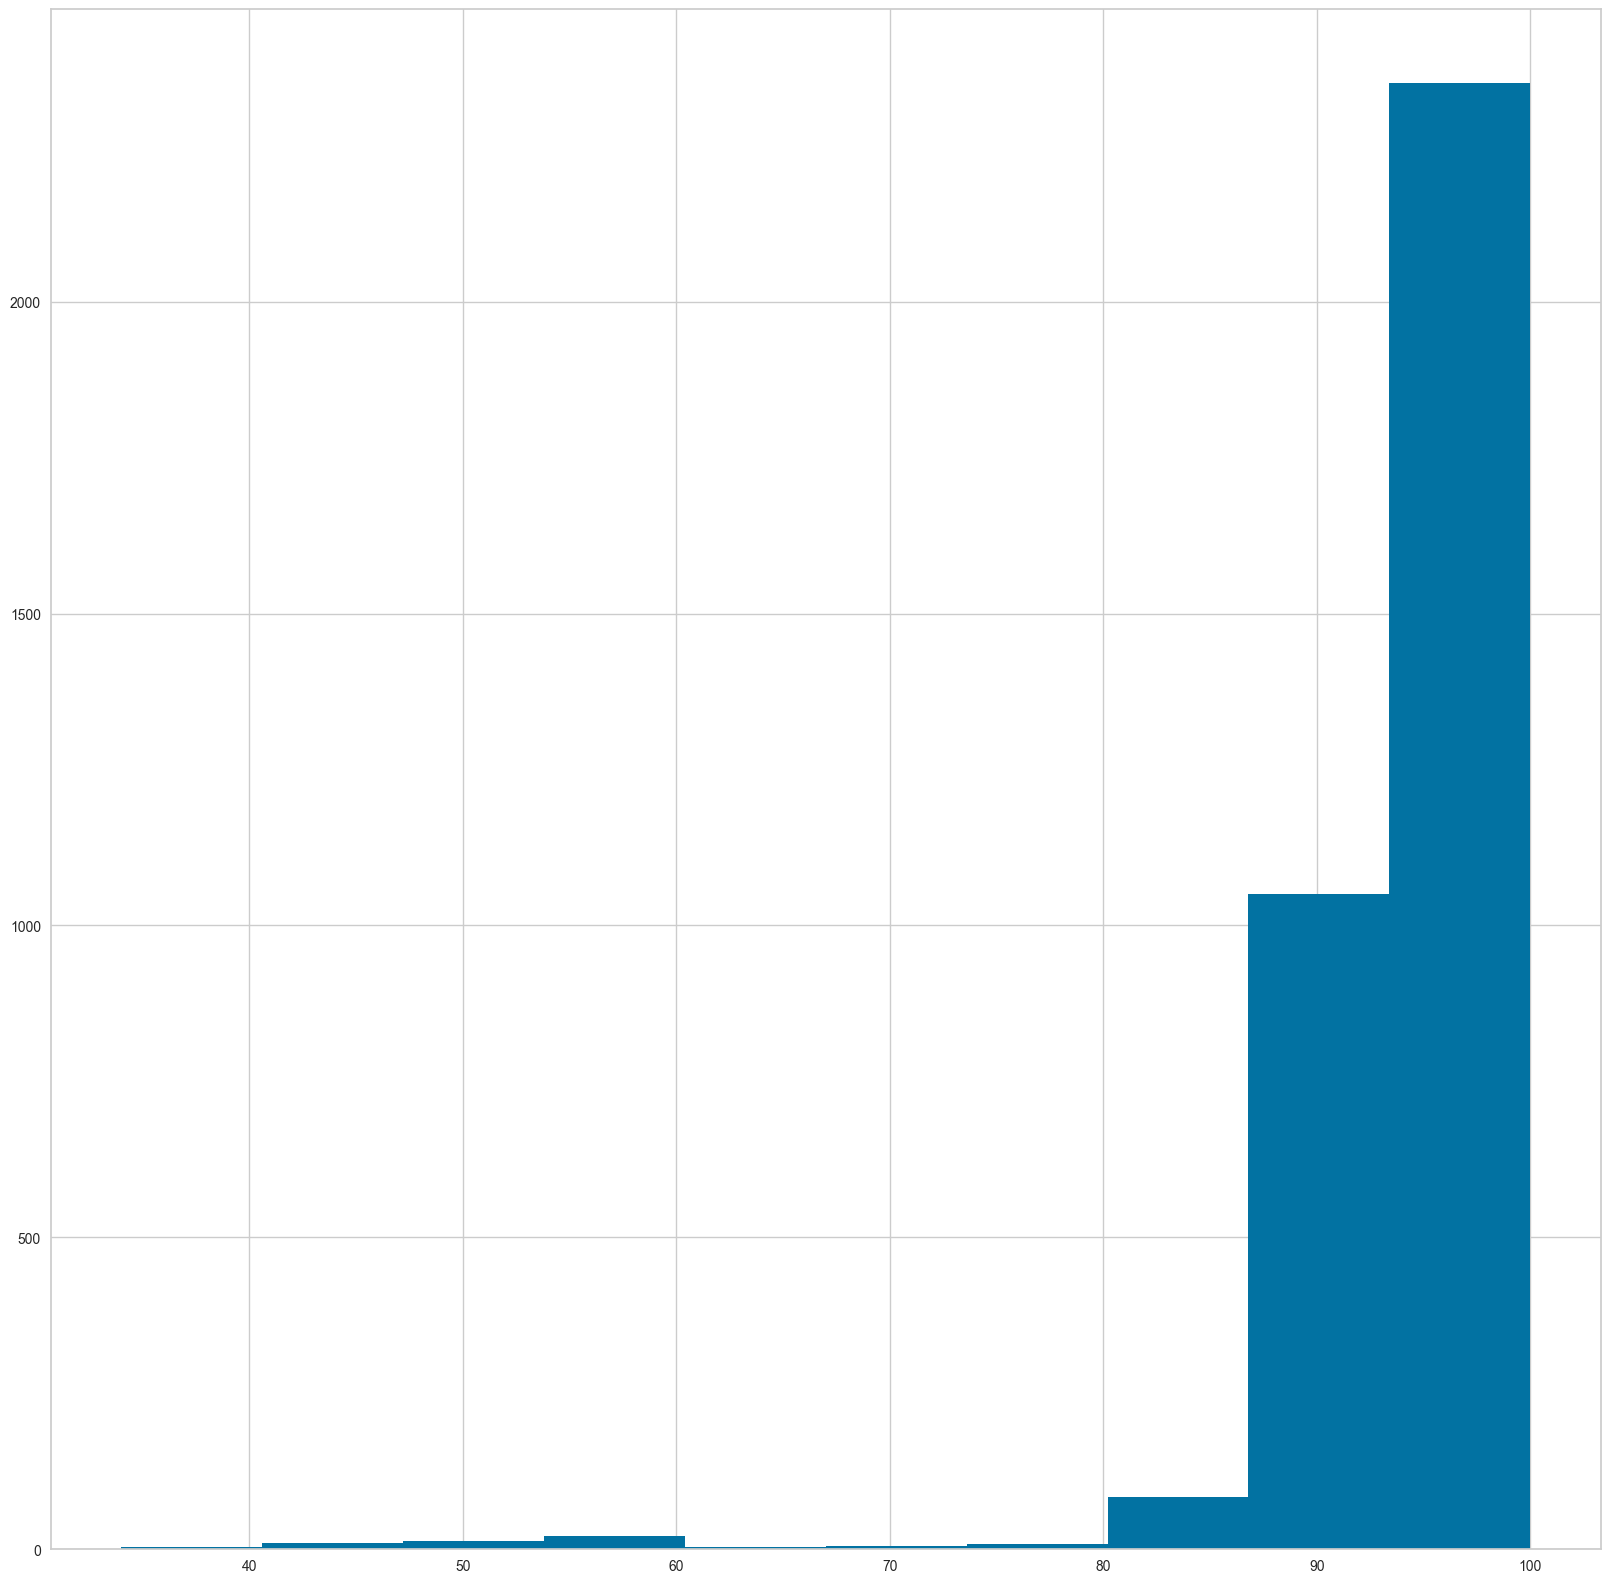

In [276]:
df['sleep_efficiency'].hist()

In [277]:
df.drop(['Unnamed: 0',  'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS','TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME_OFFICE', 'OTHER','OUTDOORS', 'TRANSIT', 'WORK/SCHOOL'], axis=1, inplace=True)

In [278]:
df['sleep_efficiency'].isna().sum()

3859

I am using different indicator to indicate bad sleep quality. Since this dataset does not have similar feature to the previous one. I, therefore, select sleep_efficiency and use a cutoff value instead.

In [279]:
for col in df.columns:
    missing_ratio = df[col].isna().sum() / len(df[col])
    print(f'{col} has {missing_ratio:.2%} missing values')
    if(missing_ratio > 0.45 and col != 'sleep_efficiency'):
        df.drop(col, axis=1, inplace=True)
        print(f'{col} dropped')
    print('---')

id has 0.00% missing values
---
date has 0.00% missing values
---
nightly_temperature has 54.67% missing values
nightly_temperature dropped
---
nremhr has 66.60% missing values
nremhr dropped
---
rmssd has 66.60% missing values
rmssd dropped
---
spo2 has 82.86% missing values
spo2 dropped
---
full_sleep_breathing_rate has 66.33% missing values
full_sleep_breathing_rate dropped
---
stress_score has 74.68% missing values
stress_score dropped
---
sleep_points_percentage has 74.68% missing values
sleep_points_percentage dropped
---
exertion_points_percentage has 74.68% missing values
exertion_points_percentage dropped
---
responsiveness_points_percentage has 74.68% missing values
responsiveness_points_percentage dropped
---
daily_temperature_variation has 55.41% missing values
daily_temperature_variation dropped
---
badgeType has 93.05% missing values
badgeType dropped
---
calories has 10.12% missing values
---
filteredDemographicVO2Max has 35.32% missing values
---
distance has 35.53% mis

In [280]:
df.isna().sum()

id                                 0
date                               0
calories                         750
filteredDemographicVO2Max       2617
distance                        2633
bpm                             2606
lightly_active_minutes           327
moderately_active_minutes        327
very_active_minutes              327
sedentary_minutes                327
mindfulness_session              299
resting_hr                      2988
sleep_efficiency                3859
steps                           2633
minutes_in_default_zone_1       2602
minutes_below_default_zone_1    2602
minutes_in_default_zone_2       2602
minutes_in_default_zone_3       2602
age                              614
gender                           370
bmi                              614
dtype: int64

In [281]:
df

,id,date,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,...,resting_hr,sleep_efficiency,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,...,62.073070,93.0,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,...,62.121476,94.0,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,...,62.263999,96.0,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,...,62.368900,93.0,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,...,61.965409,94.0,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
numeric_columns = ['calories', 'filteredDemographicVO2Max', 'distance', 'bpm', 'lightly_active_minutes', 'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes', 'resting_hr', 'steps', 'sleep_efficiency']

In [283]:
df.drop(['minutes_in_default_zone_1', 'minutes_below_default_zone_1', 'minutes_in_default_zone_2', 'minutes_in_default_zone_3'], axis=1, inplace=True)

In [284]:
df['calories'].fillna(df['calories'].median(), inplace=True)
df['lightly_active_minutes'].fillna(df['lightly_active_minutes'].median(), inplace=True)
df['moderately_active_minutes'].fillna(df['moderately_active_minutes'].median(), inplace=True)
df['very_active_minutes'].fillna(df['very_active_minutes'].median(), inplace=True)
df['sedentary_minutes'].fillna(df['sedentary_minutes'].median(), inplace=True)
df['mindfulness_session'].fillna(df['mindfulness_session'].median(), inplace=True)


In [285]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'Gender Distribution')

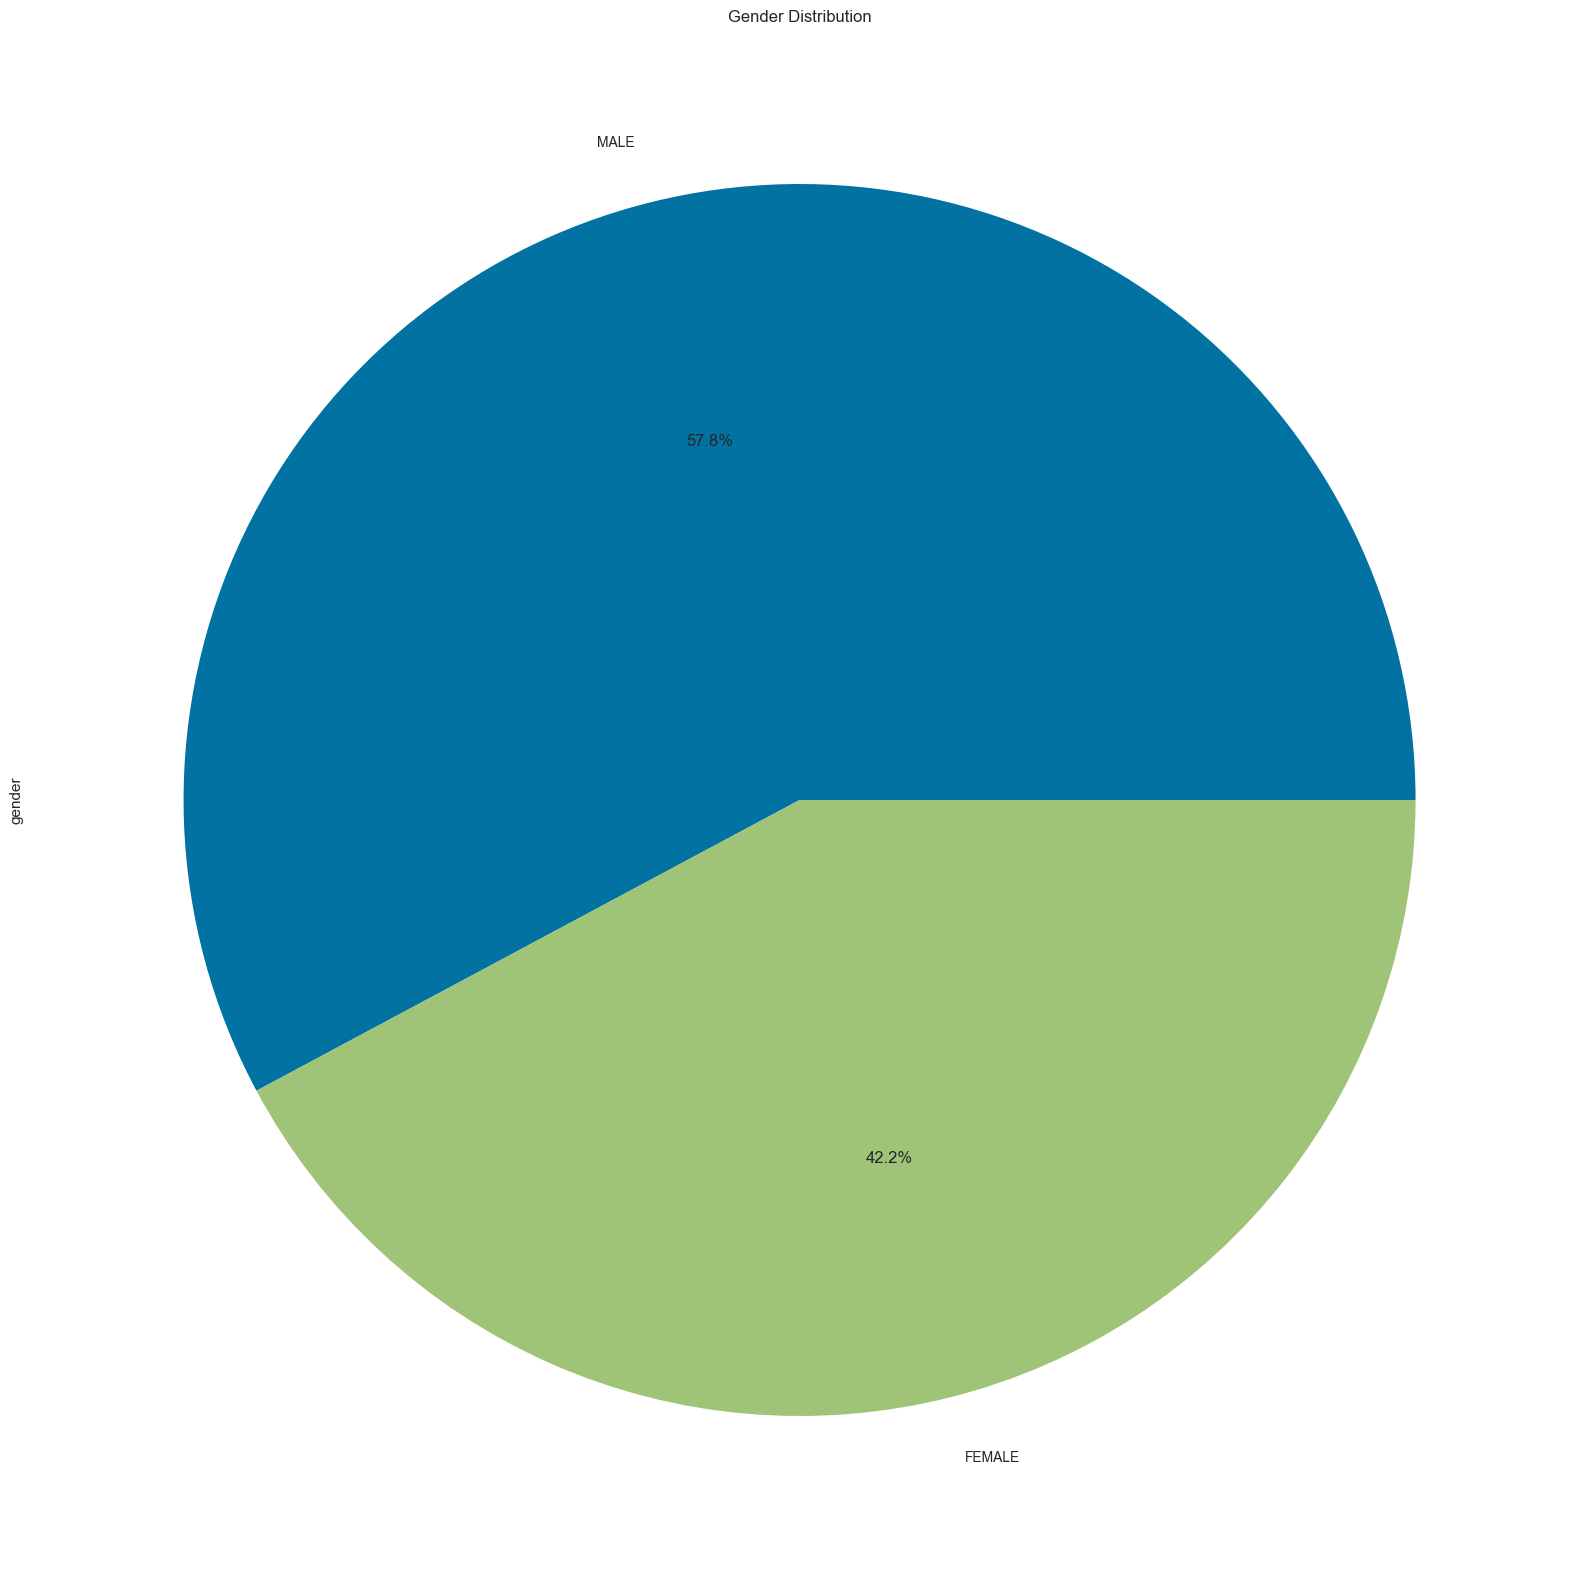

In [286]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Mindfulness Session Distribution')

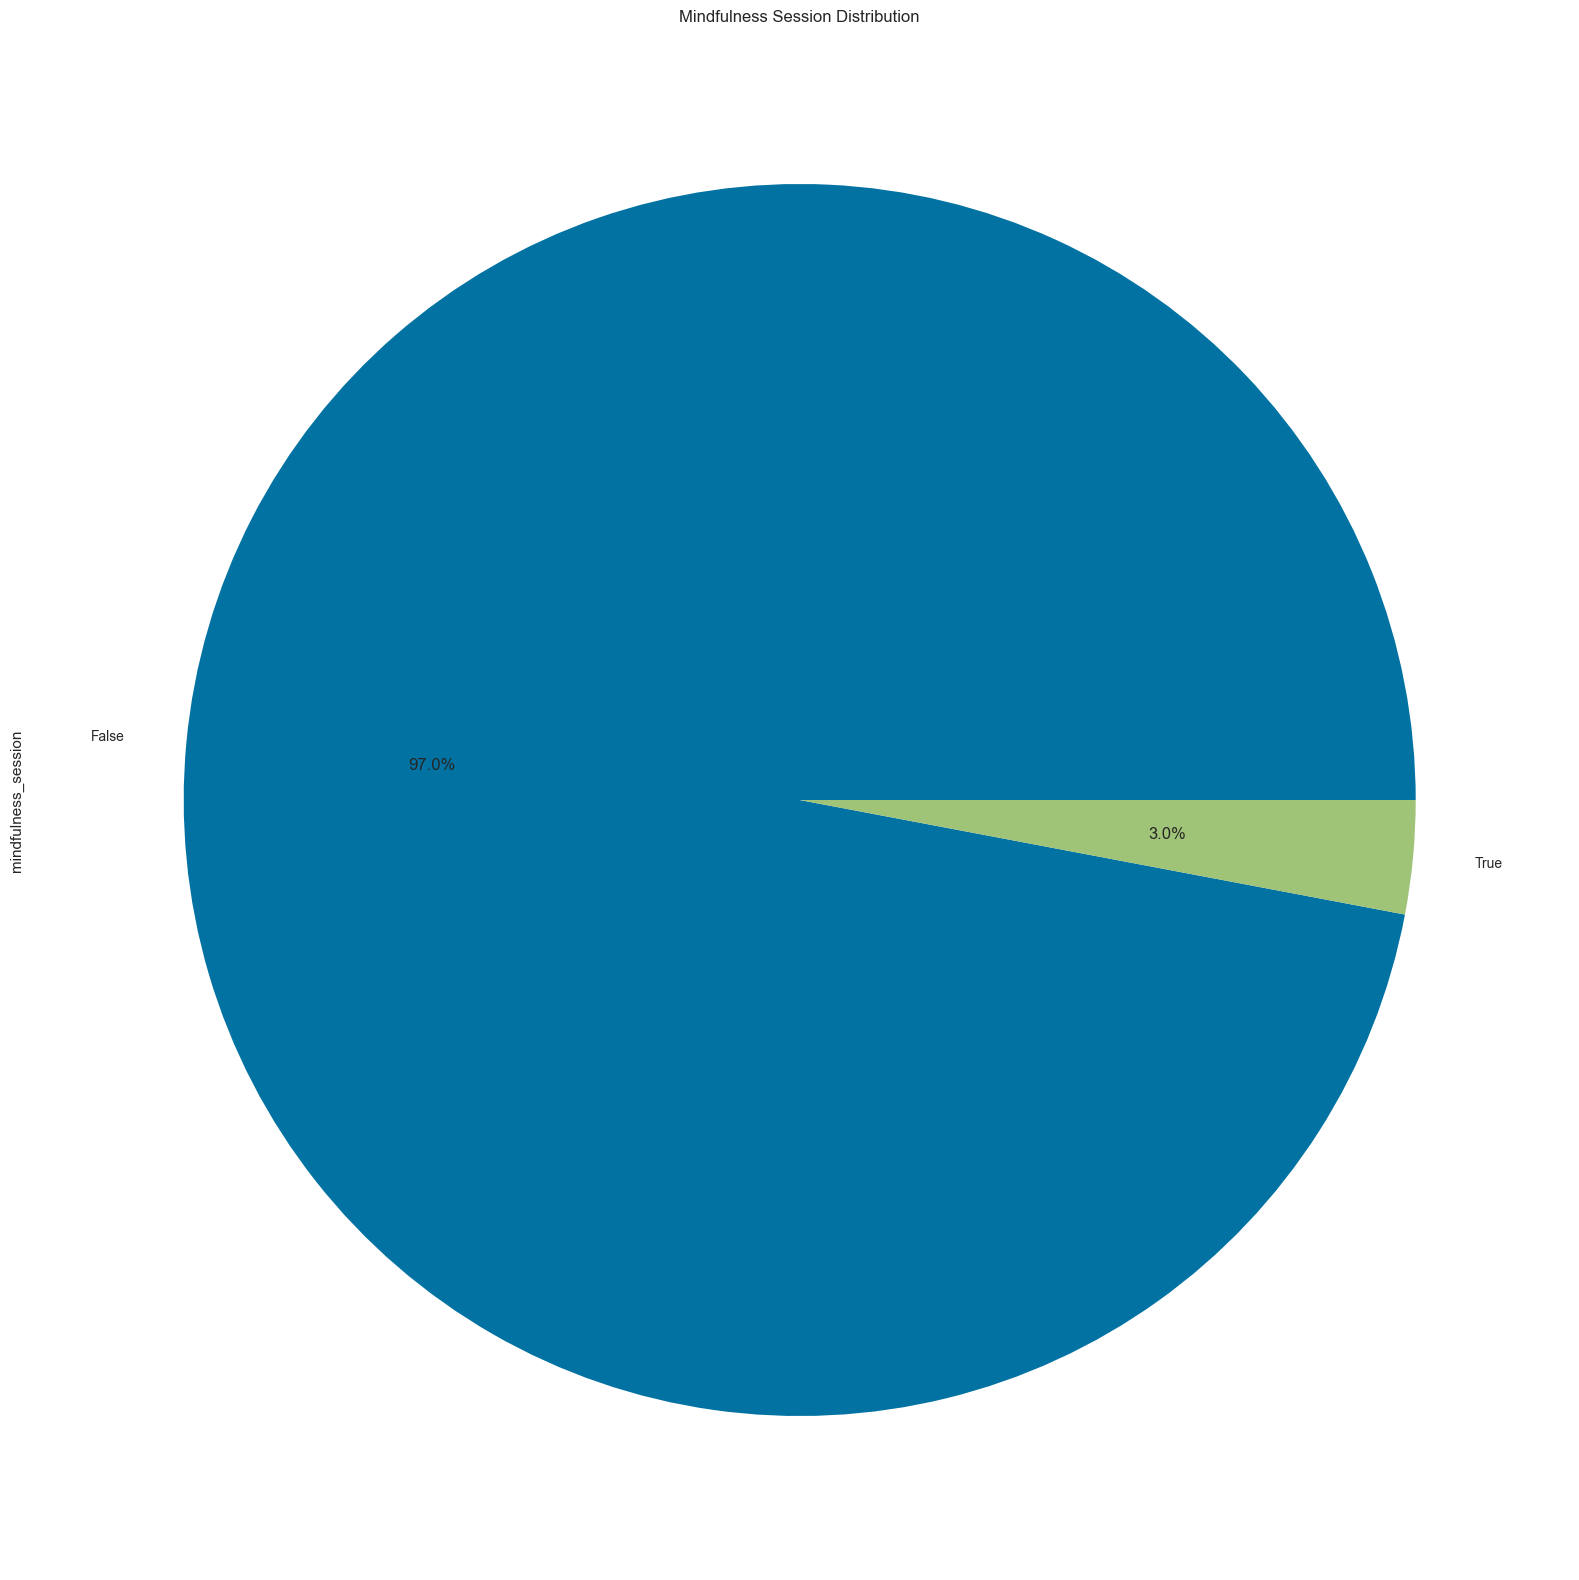

In [287]:
df['mindfulness_session'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Mindfulness Session Distribution')

In [288]:
df

,id,date,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,resting_hr,sleep_efficiency,steps,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,False,62.073070,93.0,8833.0,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,False,62.121476,94.0,9727.0,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,False,62.263999,96.0,8253.0,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,False,62.368900,93.0,9015.0,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,False,61.965409,94.0,12949.0,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,621e375b67b776a240290cdc,2021-07-25,2239.31,36.39193,8995.8,83.825390,355.0,19.0,2.0,668.0,False,73.766306,95.0,13638.0,<30,FEMALE,23.0
7377,621e375b67b776a240290cdc,2021-07-26,1768.30,36.41969,3537.0,79.489138,182.0,16.0,3.0,766.0,False,73.250128,98.0,5366.0,<30,FEMALE,23.0
7378,621e375b67b776a240290cdc,2021-07-27,2108.29,36.42334,6891.1,85.041054,266.0,23.0,20.0,667.0,False,73.641412,97.0,10448.0,<30,FEMALE,23.0
7380,621e375b67b776a240290cdc,2021-07-29,2209.04,36.43511,11254.1,78.874591,273.0,49.0,26.0,556.0,False,73.422378,93.0,17051.0,<30,FEMALE,23.0


In [289]:
# loop over rows
genders = []
mindfulness = []
for index, row in df.iterrows():
    if(row['gender'] == 'MALE'):
        genders.append(1)
    elif(row['gender'] == 'FEMALE'):
        genders.append(2)

    if(row['mindfulness_session'] == True):
        mindfulness.append(1)
    elif(row['mindfulness_session'] == False):
        mindfulness.append(0)

df.drop(['mindfulness_session', 'gender'], axis=1, inplace=True)
df['genders'] = genders
df['mindfulness_session'] = mindfulness

Text(0.5, 1.0, 'BMI Distribution')

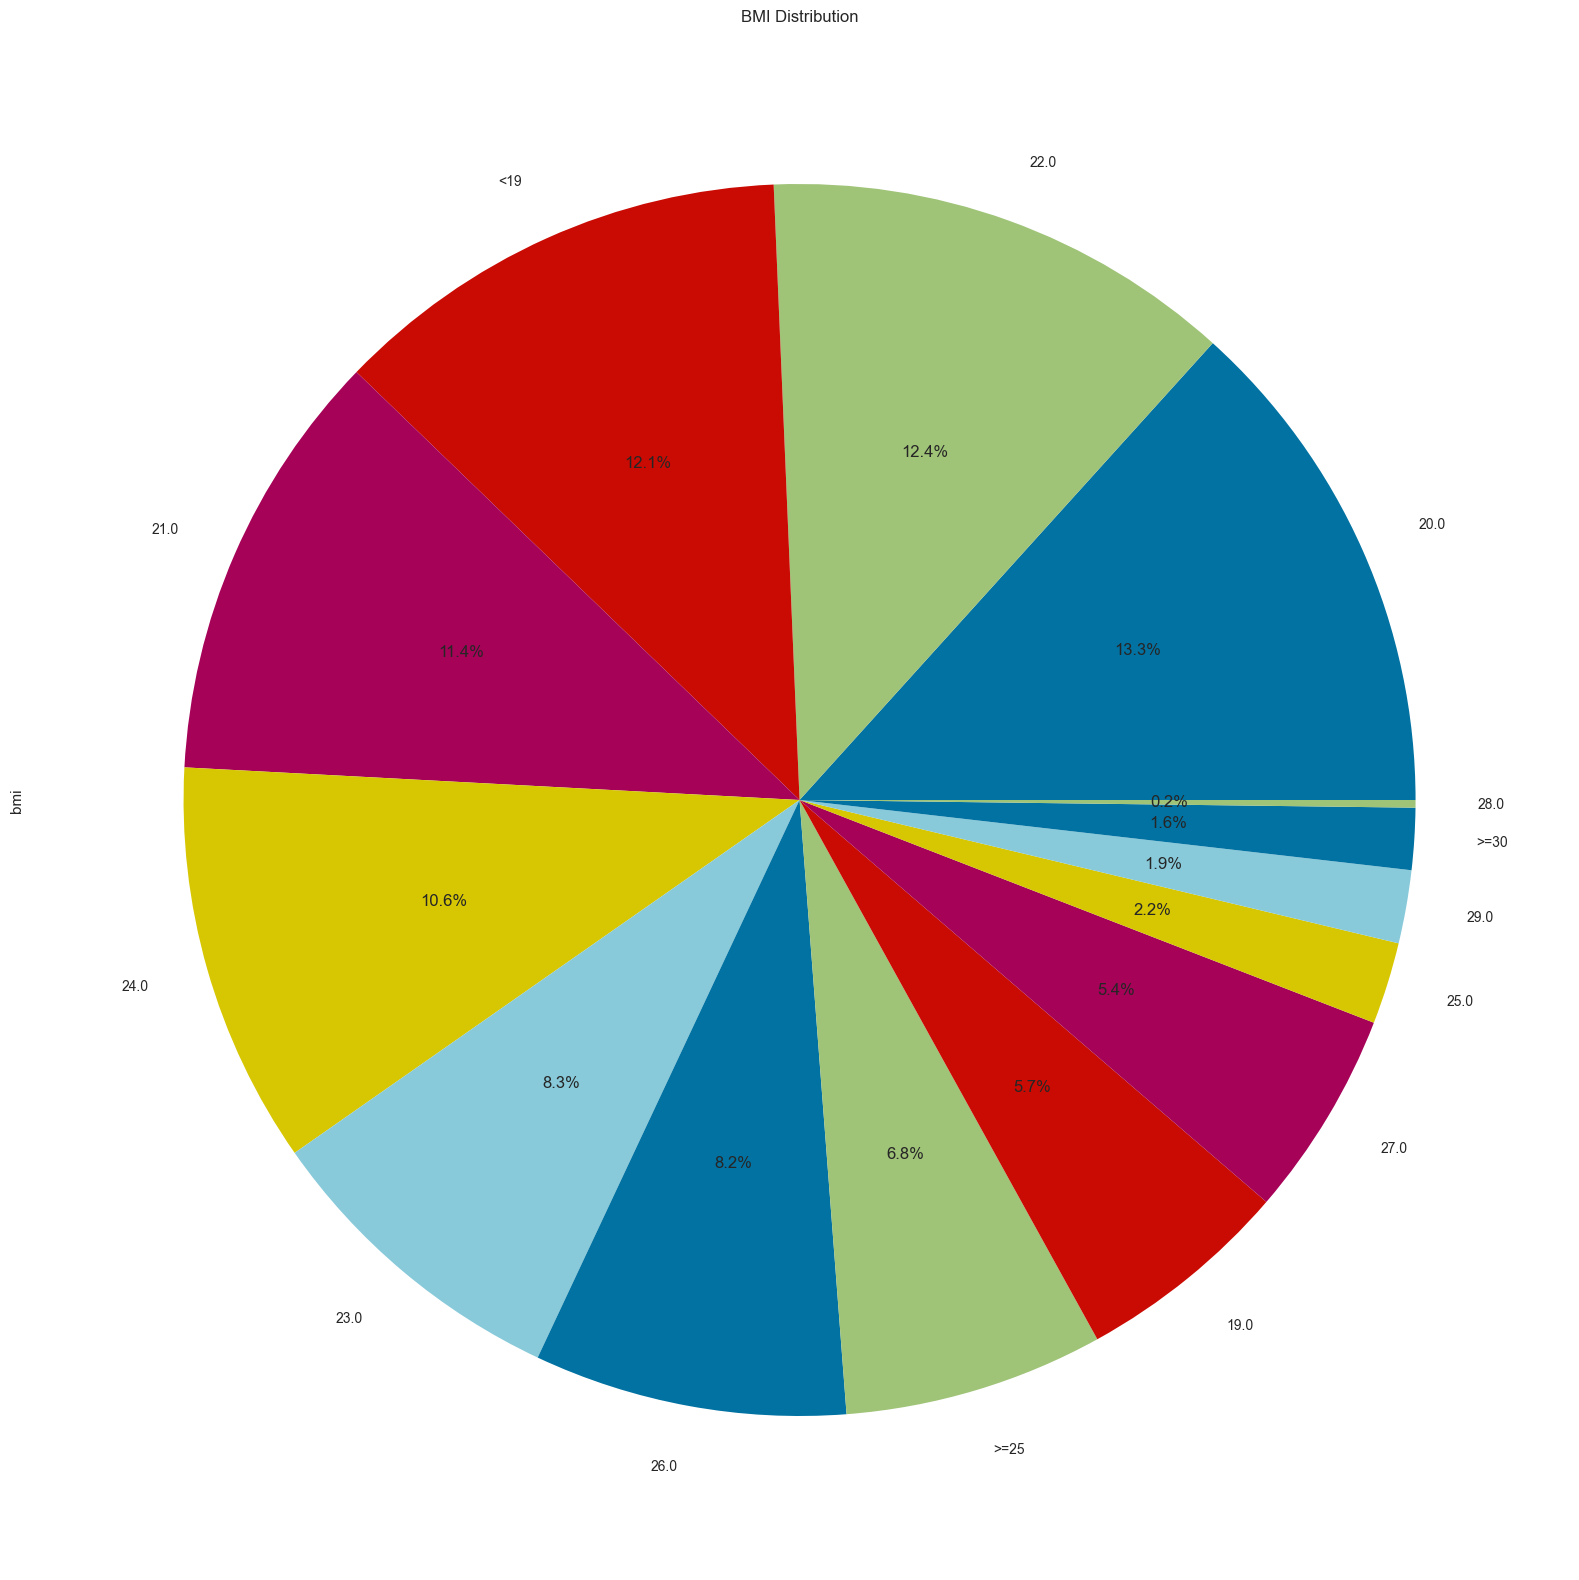

In [290]:
df['bmi'].value_counts().plot.pie(autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Age Distribution')

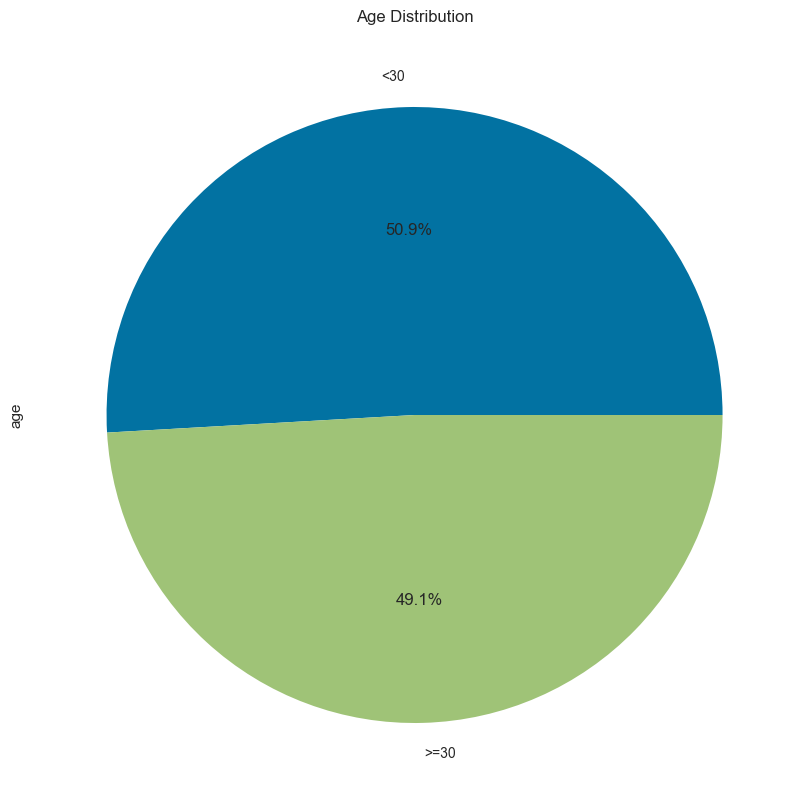

In [291]:
df['age'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Age Distribution')

In [292]:
# use ordinal scaler for BMI column
from sklearn.preprocessing import OrdinalEncoder

bmi_df = df[['bmi']]
age_df = df[['age']]

df.drop(['bmi', 'age'], axis=1, inplace=True)
encoder = OrdinalEncoder()
encoded_bmi = encoder.fit_transform(bmi_df)

df['bmi'] = encoded_bmi

encoded_age = encoder.fit_transform(age_df)
df['age'] = encoded_age



array([[<AxesSubplot: title={'center': 'calories'}>,
        <AxesSubplot: title={'center': 'filteredDemographicVO2Max'}>,
        <AxesSubplot: title={'center': 'distance'}>],
       [<AxesSubplot: title={'center': 'bpm'}>,
        <AxesSubplot: title={'center': 'lightly_active_minutes'}>,
        <AxesSubplot: title={'center': 'moderately_active_minutes'}>],
       [<AxesSubplot: title={'center': 'very_active_minutes'}>,
        <AxesSubplot: title={'center': 'sedentary_minutes'}>,
        <AxesSubplot: title={'center': 'resting_hr'}>],
       [<AxesSubplot: title={'center': 'steps'}>,
        <AxesSubplot: title={'center': 'sleep_efficiency'}>,
        <AxesSubplot: >]], dtype=object)

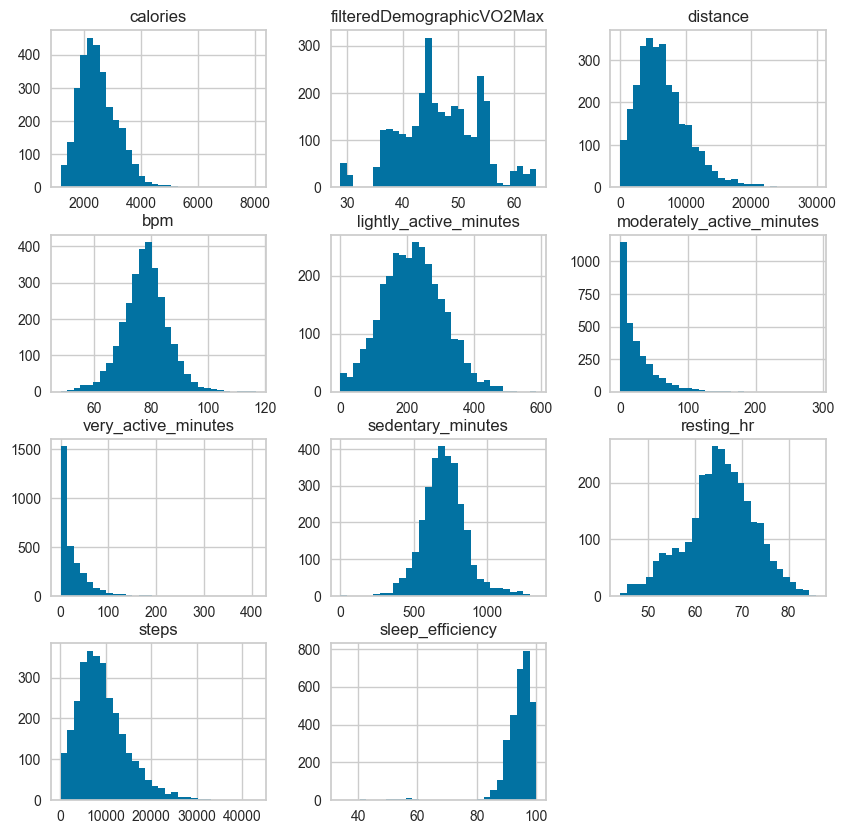

In [293]:
df[numeric_columns].hist(bins=30)

In [294]:
df.isna().sum()

id                           0
date                         0
calories                     0
filteredDemographicVO2Max    0
distance                     0
bpm                          0
lightly_active_minutes       0
moderately_active_minutes    0
very_active_minutes          0
sedentary_minutes            0
resting_hr                   0
sleep_efficiency             0
steps                        0
genders                      0
mindfulness_session          0
bmi                          0
age                          0
dtype: int64

In [295]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

array([[<AxesSubplot: title={'center': 'calories'}>,
        <AxesSubplot: title={'center': 'filteredDemographicVO2Max'}>,
        <AxesSubplot: title={'center': 'distance'}>],
       [<AxesSubplot: title={'center': 'bpm'}>,
        <AxesSubplot: title={'center': 'lightly_active_minutes'}>,
        <AxesSubplot: title={'center': 'moderately_active_minutes'}>],
       [<AxesSubplot: title={'center': 'very_active_minutes'}>,
        <AxesSubplot: title={'center': 'sedentary_minutes'}>,
        <AxesSubplot: title={'center': 'resting_hr'}>],
       [<AxesSubplot: title={'center': 'steps'}>,
        <AxesSubplot: title={'center': 'sleep_efficiency'}>,
        <AxesSubplot: >]], dtype=object)

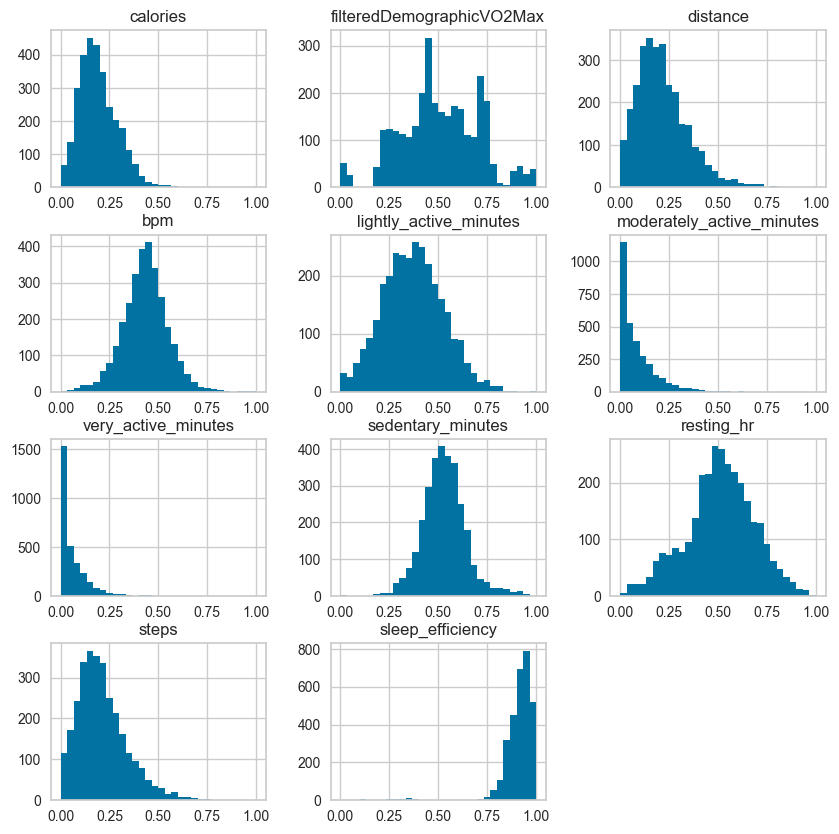

In [296]:
df[numeric_columns].hist(bins=30)

In [297]:
df

,id,date,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,steps,genders,mindfulness_session,bmi,age
0,621e2e8e67b776a24055b564,2021-05-24,0.173334,0.968873,0.218022,0.340482,0.254701,0.083045,0.080685,0.532885,0.430625,0.893939,0.204553,1,0,11.0,0.0
1,621e2e8e67b776a24055b564,2021-05-25,0.170505,0.965645,0.240178,0.324093,0.225641,0.086505,0.075795,0.526158,0.431787,0.909091,0.225298,1,0,11.0,0.0
2,621e2e8e67b776a24055b564,2021-05-26,0.160383,0.962616,0.203725,0.342542,0.191453,0.093426,0.075795,0.530643,0.435206,0.939394,0.191094,1,0,11.0,0.0
3,621e2e8e67b776a24055b564,2021-05-27,0.169492,0.959812,0.222567,0.340832,0.227350,0.072664,0.090465,0.464873,0.437722,0.893939,0.208776,1,0,11.0,0.0
4,621e2e8e67b776a24055b564,2021-05-28,0.207445,0.958005,0.319917,0.379906,0.232479,0.145329,0.132029,0.483558,0.428043,0.909091,0.300065,1,0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,621e375b67b776a240290cdc,2021-07-25,0.157049,0.214731,0.301079,0.517541,0.606838,0.065744,0.004890,0.499253,0.711146,0.924242,0.316053,2,0,4.0,0.0
7377,621e375b67b776a240290cdc,2021-07-26,0.088730,0.215524,0.118135,0.454213,0.311111,0.055363,0.007335,0.572496,0.698763,0.969697,0.124101,2,0,4.0,0.0
7378,621e375b67b776a240290cdc,2021-07-27,0.138044,0.215628,0.230543,0.535294,0.454701,0.079585,0.048900,0.498505,0.708149,0.954545,0.242029,2,0,4.0,0.0
7380,621e375b67b776a240290cdc,2021-07-29,0.152658,0.215964,0.376762,0.445238,0.466667,0.169550,0.063570,0.415546,0.702895,0.893939,0.395252,2,0,4.0,0.0


Text(0.5, 1.0, 'Sleep Efficiency Distribution')

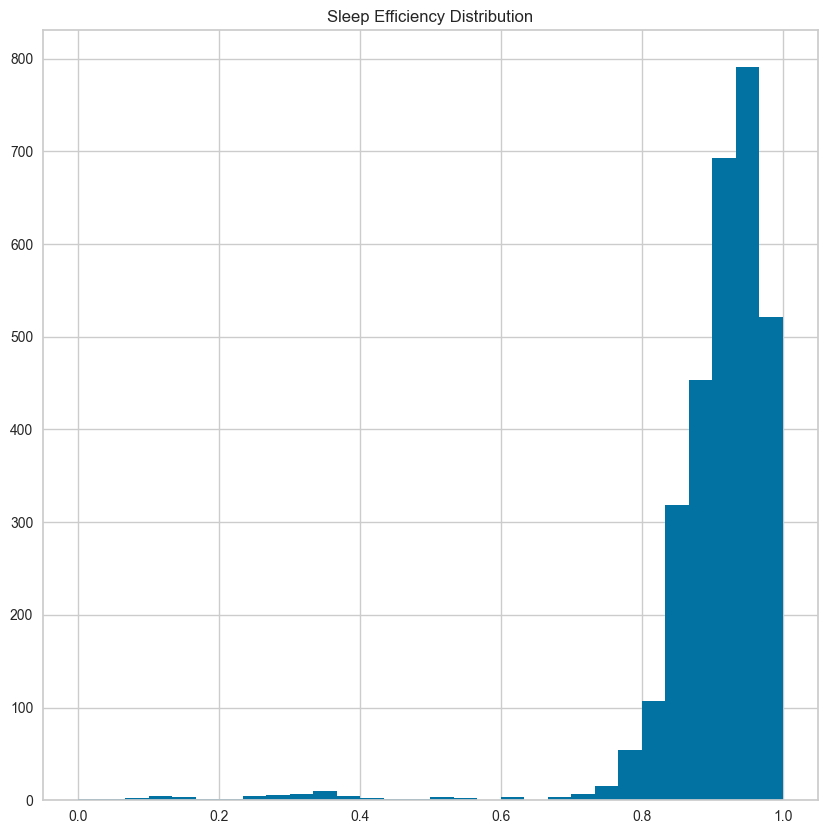

In [298]:
df['sleep_efficiency'].hist(bins=30)
plt.title('Sleep Efficiency Distribution')

In [299]:
df['sleep_efficiency'].describe()

count    3023.000000
mean        0.904209
std         0.100601
min         0.000000
25%         0.886364
50%         0.924242
75%         0.954545
max         1.000000
Name: sleep_efficiency, dtype: float64

In [300]:
def get_sleep_quality(efficiency):
    # use Fitbit sleep score
    if (efficiency < 0.6) or (0.6 <= efficiency and efficiency < 0.8): # poor or fair
        return 1
    elif (0.8 <= efficiency and efficiency < 0.9) : # good
        return 2 
    else: # excellent
        return 3

for index, row in df.iterrows():
    df.loc[index, 'SleepQuality'] = get_sleep_quality(row['sleep_efficiency'])

In [301]:
df['SleepQuality'].value_counts()

3.0    2005
2.0     878
1.0     140
Name: SleepQuality, dtype: int64

In [302]:
# sample SleepQuality for all class to have similar distribution
class_1 = df[df['SleepQuality'] == 1]
class_2 = df[df['SleepQuality'] == 2]
class_3 = df[df['SleepQuality'] == 3]
df_tmp = class_3.sample(len(class_2) + len(class_1), replace=True)

df = pd.concat([df_tmp, class_1, class_2], axis=0).reset_index(drop=True)

print(len(df_tmp)/len(df))
print(len(class_1)/len(df))
print(len(class_2)/len(df))

print(len(df_tmp))
print(len(class_1))
print(len(class_2))

0.5
0.068762278978389
0.431237721021611
1018
140
878


In [303]:
df

,id,date,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,steps,genders,mindfulness_session,bmi,age,SleepQuality
0,621e2f3967b776a240c654db,2021-07-16,0.293827,0.654821,0.338225,0.532190,0.213675,0.283737,0.320293,0.414051,0.494555,0.924242,0.339351,1,0,5.0,1.0,3.0
1,621e30c867b776a240d4aa6c,2021-07-21,0.153401,0.461104,0.367409,0.372458,0.406838,0.173010,0.127139,0.458146,0.361916,0.954545,0.375180,2,0,1.0,0.0,3.0
2,621e322367b776a240e44e9b,2021-12-05,0.212465,0.463946,0.196423,0.365624,0.343590,0.034602,0.022005,0.520179,0.573653,0.969697,0.186221,1,0,8.0,1.0,3.0
3,621e310d67b776a24003096d,2021-10-08,0.117480,0.363743,0.156927,0.526774,0.502564,0.062284,0.009780,0.526906,0.574968,0.969697,0.165174,2,1,1.0,1.0,3.0
4,621e33cf67b776a240087de9,2021-12-09,0.292333,0.463400,0.218116,0.431186,0.511111,0.128028,0.014670,0.529895,0.459573,0.924242,0.203741,1,0,7.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,621e375b67b776a240290cdc,2021-07-06,0.110980,0.247877,0.169485,0.447573,0.411966,0.044983,0.004890,0.467115,0.627696,0.893939,0.177983,2,0,4.0,0.0,2.0
2032,621e375b67b776a240290cdc,2021-07-11,0.095691,0.224975,0.144292,0.556622,0.379487,0.000000,0.000000,0.840060,0.751515,0.893939,0.151529,2,0,4.0,0.0,2.0
2033,621e375b67b776a240290cdc,2021-07-22,0.078730,0.205862,0.150074,0.385480,0.234188,0.055363,0.029340,0.904335,0.672880,0.833333,0.157493,2,0,4.0,0.0,2.0
2034,621e375b67b776a240290cdc,2021-07-23,0.185797,0.212763,0.278089,0.629311,0.502564,0.204152,0.105134,0.423767,0.619056,0.863636,0.305588,2,0,4.0,0.0,2.0


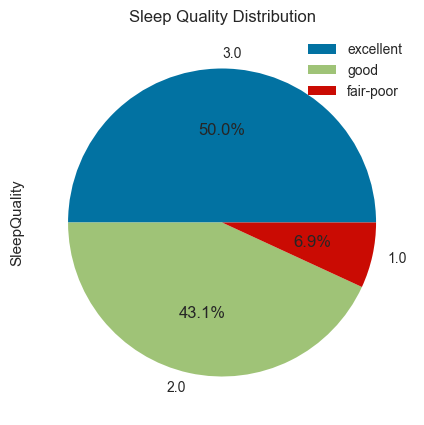

In [304]:
prediction_target = ['excellent', 'good', 'fair-poor']

df['SleepQuality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.title('Sleep Quality Distribution')
plt.legend(prediction_target)

array([[<AxesSubplot: title={'center': 'genders'}>,
        <AxesSubplot: title={'center': 'mindfulness_session'}>],
       [<AxesSubplot: title={'center': 'bmi'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'SleepQuality'}>, <AxesSubplot: >]],
      dtype=object)

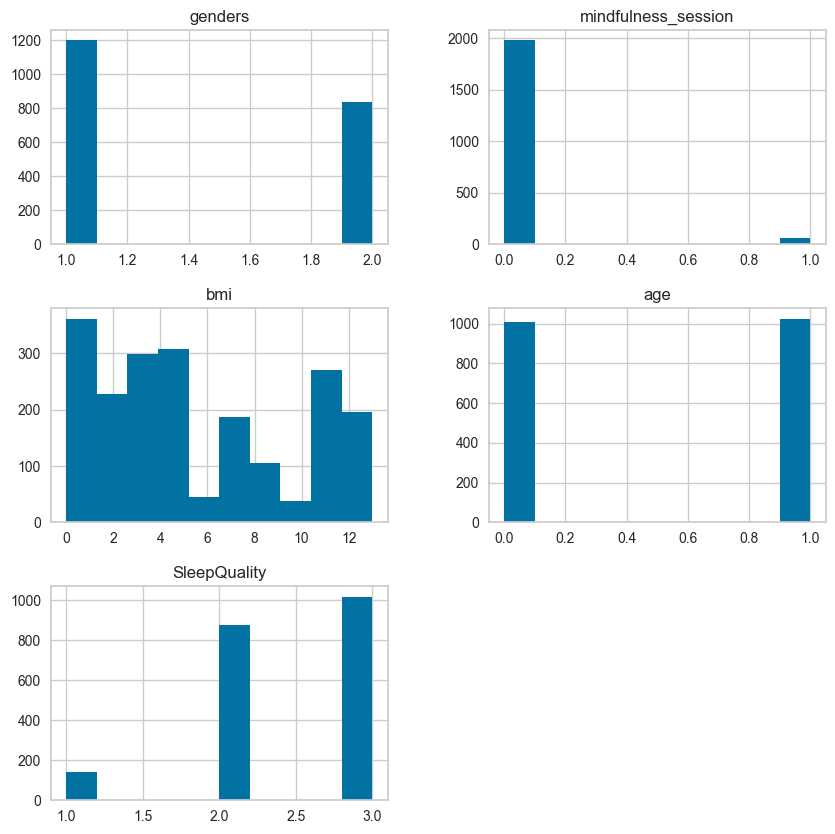

In [305]:
# plot non-numerical columns

df[df.columns[~df.columns.isin(numeric_columns)]].hist()

In [306]:
df.columns

Index(['id', 'date', 'calories', 'filteredDemographicVO2Max', 'distance',
       'bpm', 'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'resting_hr',
       'sleep_efficiency', 'steps', 'genders', 'mindfulness_session', 'bmi',
       'age', 'SleepQuality'],
      dtype='object')

Note that now we use SleepQuality as Y value

In [307]:
df.columns

Index(['id', 'date', 'calories', 'filteredDemographicVO2Max', 'distance',
       'bpm', 'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'resting_hr',
       'sleep_efficiency', 'steps', 'genders', 'mindfulness_session', 'bmi',
       'age', 'SleepQuality'],
      dtype='object')

# Model

## Logistic Regression

/var/folders/pf/z8gx8qw104xby0jdggl6xdnc0000gn/T/ipykernel_17604/3677994740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

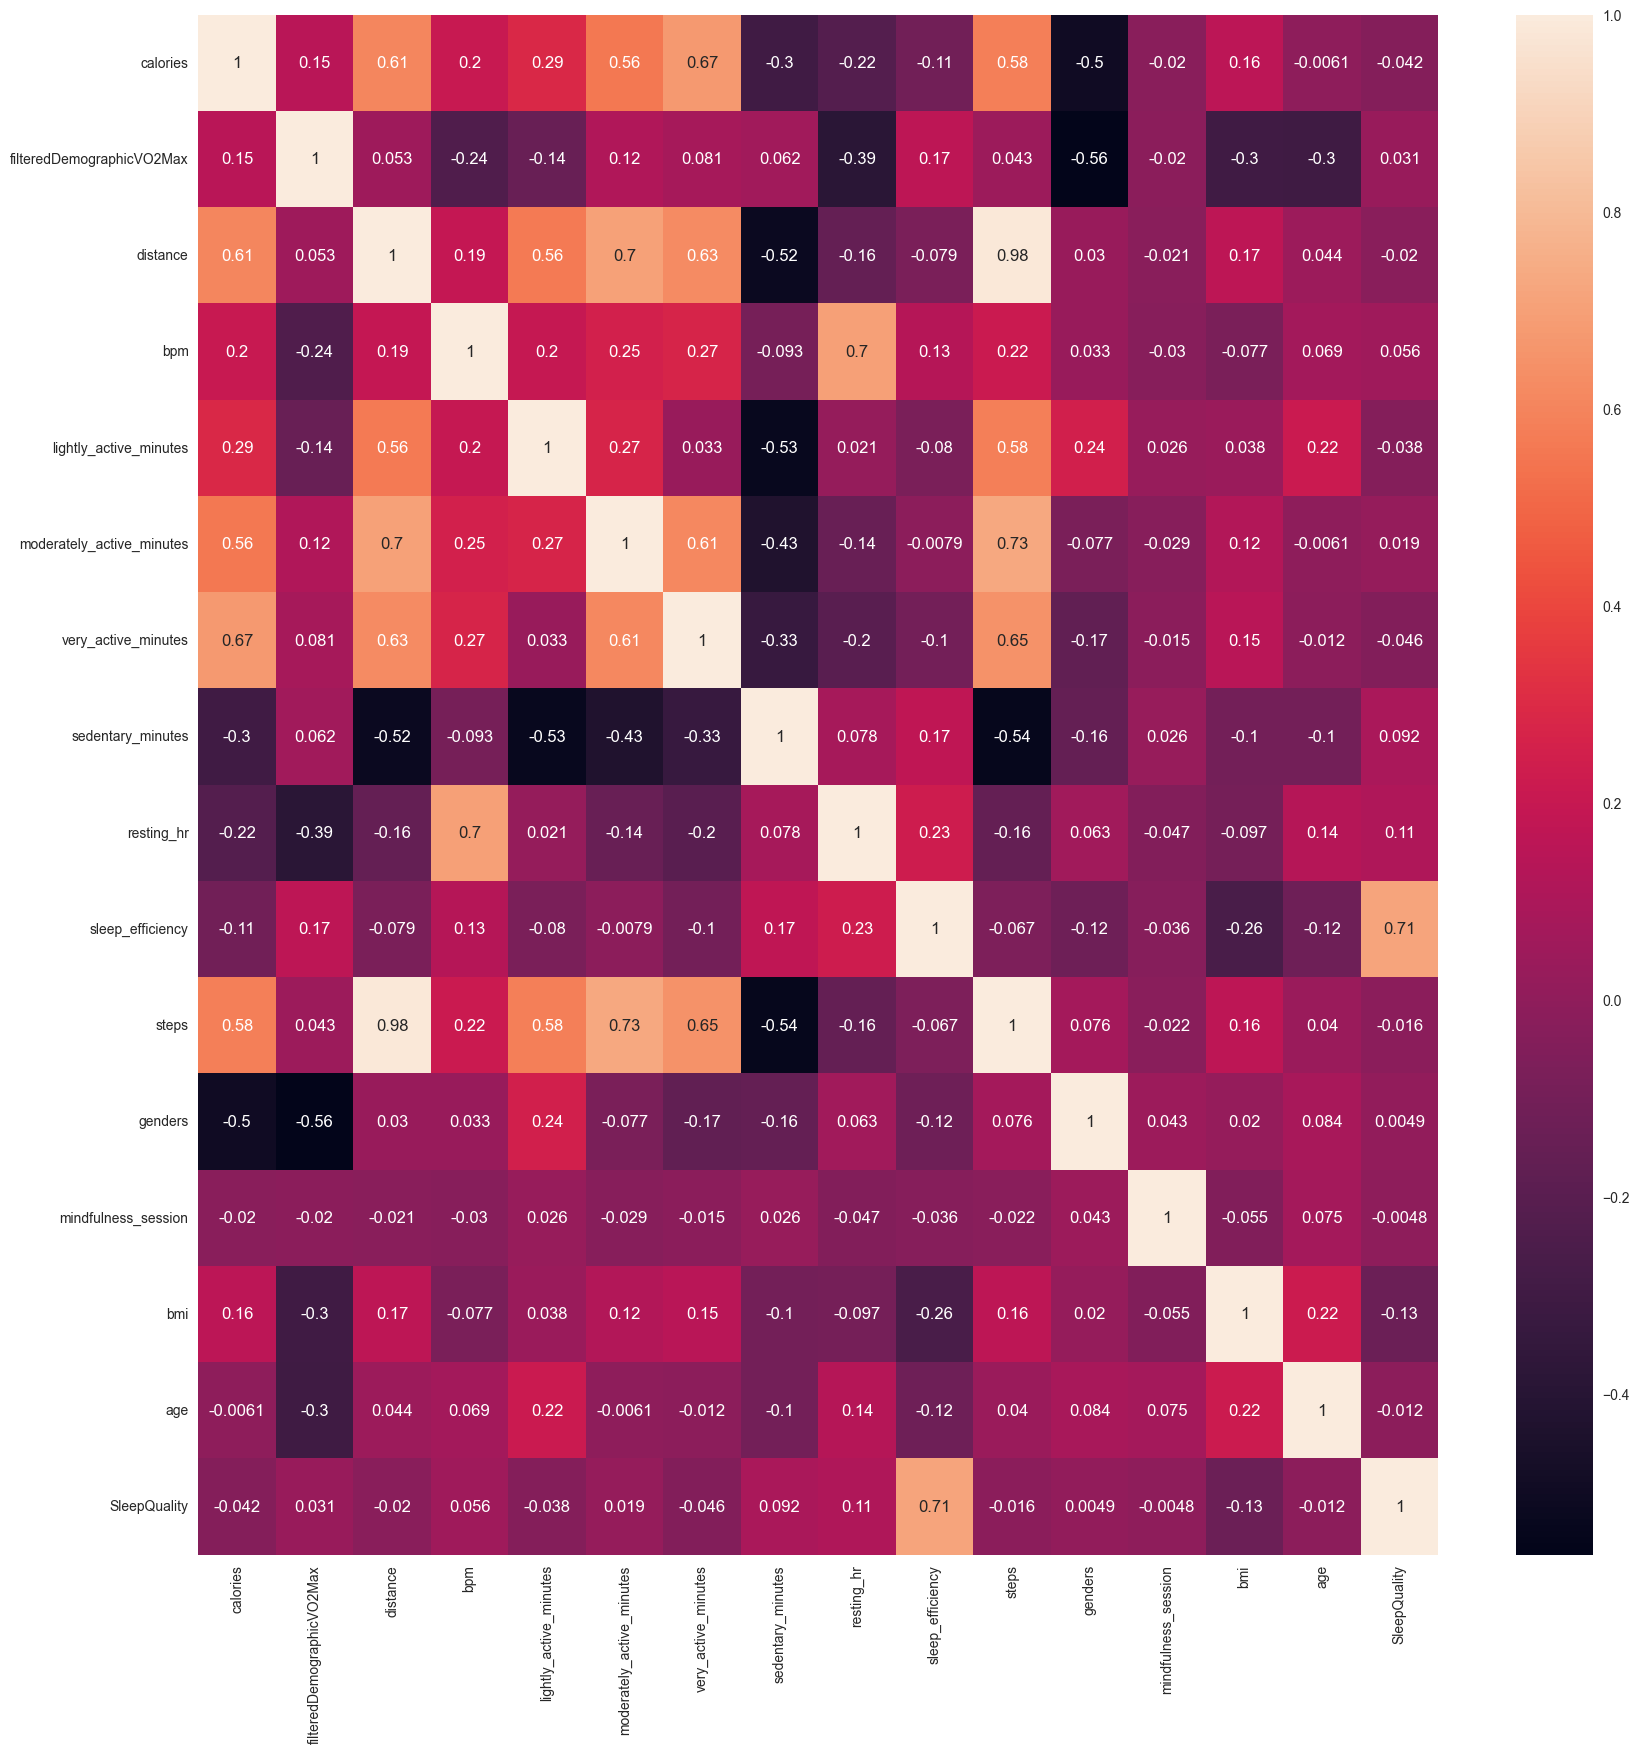

In [308]:
plt.rcParams['figure.figsize'] = [20, 20]
sns.heatmap(df.corr(), annot=True)

In [309]:
df

,id,date,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,steps,genders,mindfulness_session,bmi,age,SleepQuality
0,621e2f3967b776a240c654db,2021-07-16,0.293827,0.654821,0.338225,0.532190,0.213675,0.283737,0.320293,0.414051,0.494555,0.924242,0.339351,1,0,5.0,1.0,3.0
1,621e30c867b776a240d4aa6c,2021-07-21,0.153401,0.461104,0.367409,0.372458,0.406838,0.173010,0.127139,0.458146,0.361916,0.954545,0.375180,2,0,1.0,0.0,3.0
2,621e322367b776a240e44e9b,2021-12-05,0.212465,0.463946,0.196423,0.365624,0.343590,0.034602,0.022005,0.520179,0.573653,0.969697,0.186221,1,0,8.0,1.0,3.0
3,621e310d67b776a24003096d,2021-10-08,0.117480,0.363743,0.156927,0.526774,0.502564,0.062284,0.009780,0.526906,0.574968,0.969697,0.165174,2,1,1.0,1.0,3.0
4,621e33cf67b776a240087de9,2021-12-09,0.292333,0.463400,0.218116,0.431186,0.511111,0.128028,0.014670,0.529895,0.459573,0.924242,0.203741,1,0,7.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,621e375b67b776a240290cdc,2021-07-06,0.110980,0.247877,0.169485,0.447573,0.411966,0.044983,0.004890,0.467115,0.627696,0.893939,0.177983,2,0,4.0,0.0,2.0
2032,621e375b67b776a240290cdc,2021-07-11,0.095691,0.224975,0.144292,0.556622,0.379487,0.000000,0.000000,0.840060,0.751515,0.893939,0.151529,2,0,4.0,0.0,2.0
2033,621e375b67b776a240290cdc,2021-07-22,0.078730,0.205862,0.150074,0.385480,0.234188,0.055363,0.029340,0.904335,0.672880,0.833333,0.157493,2,0,4.0,0.0,2.0
2034,621e375b67b776a240290cdc,2021-07-23,0.185797,0.212763,0.278089,0.629311,0.502564,0.204152,0.105134,0.423767,0.619056,0.863636,0.305588,2,0,4.0,0.0,2.0


In [310]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, precision_score
from sklearn import metrics

df_tmp = df.copy()
df_tmp.drop(['SleepQuality', 'sleep_efficiency', 'id', 'date'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_tmp, df[['SleepQuality']], test_size=0.2, shuffle=True, random_state=100)

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report: 
               precision    recall  f1-score   support

   excellent       1.00      0.12      0.21        34
        good       0.54      0.36      0.43       179
   fair-poor       0.52      0.75      0.61       195

    accuracy                           0.53       408
   macro avg       0.69      0.41      0.42       408
weighted avg       0.57      0.53      0.50       408
 

Accuracy on train:   0.537 

Accuracy on test:  0.529 



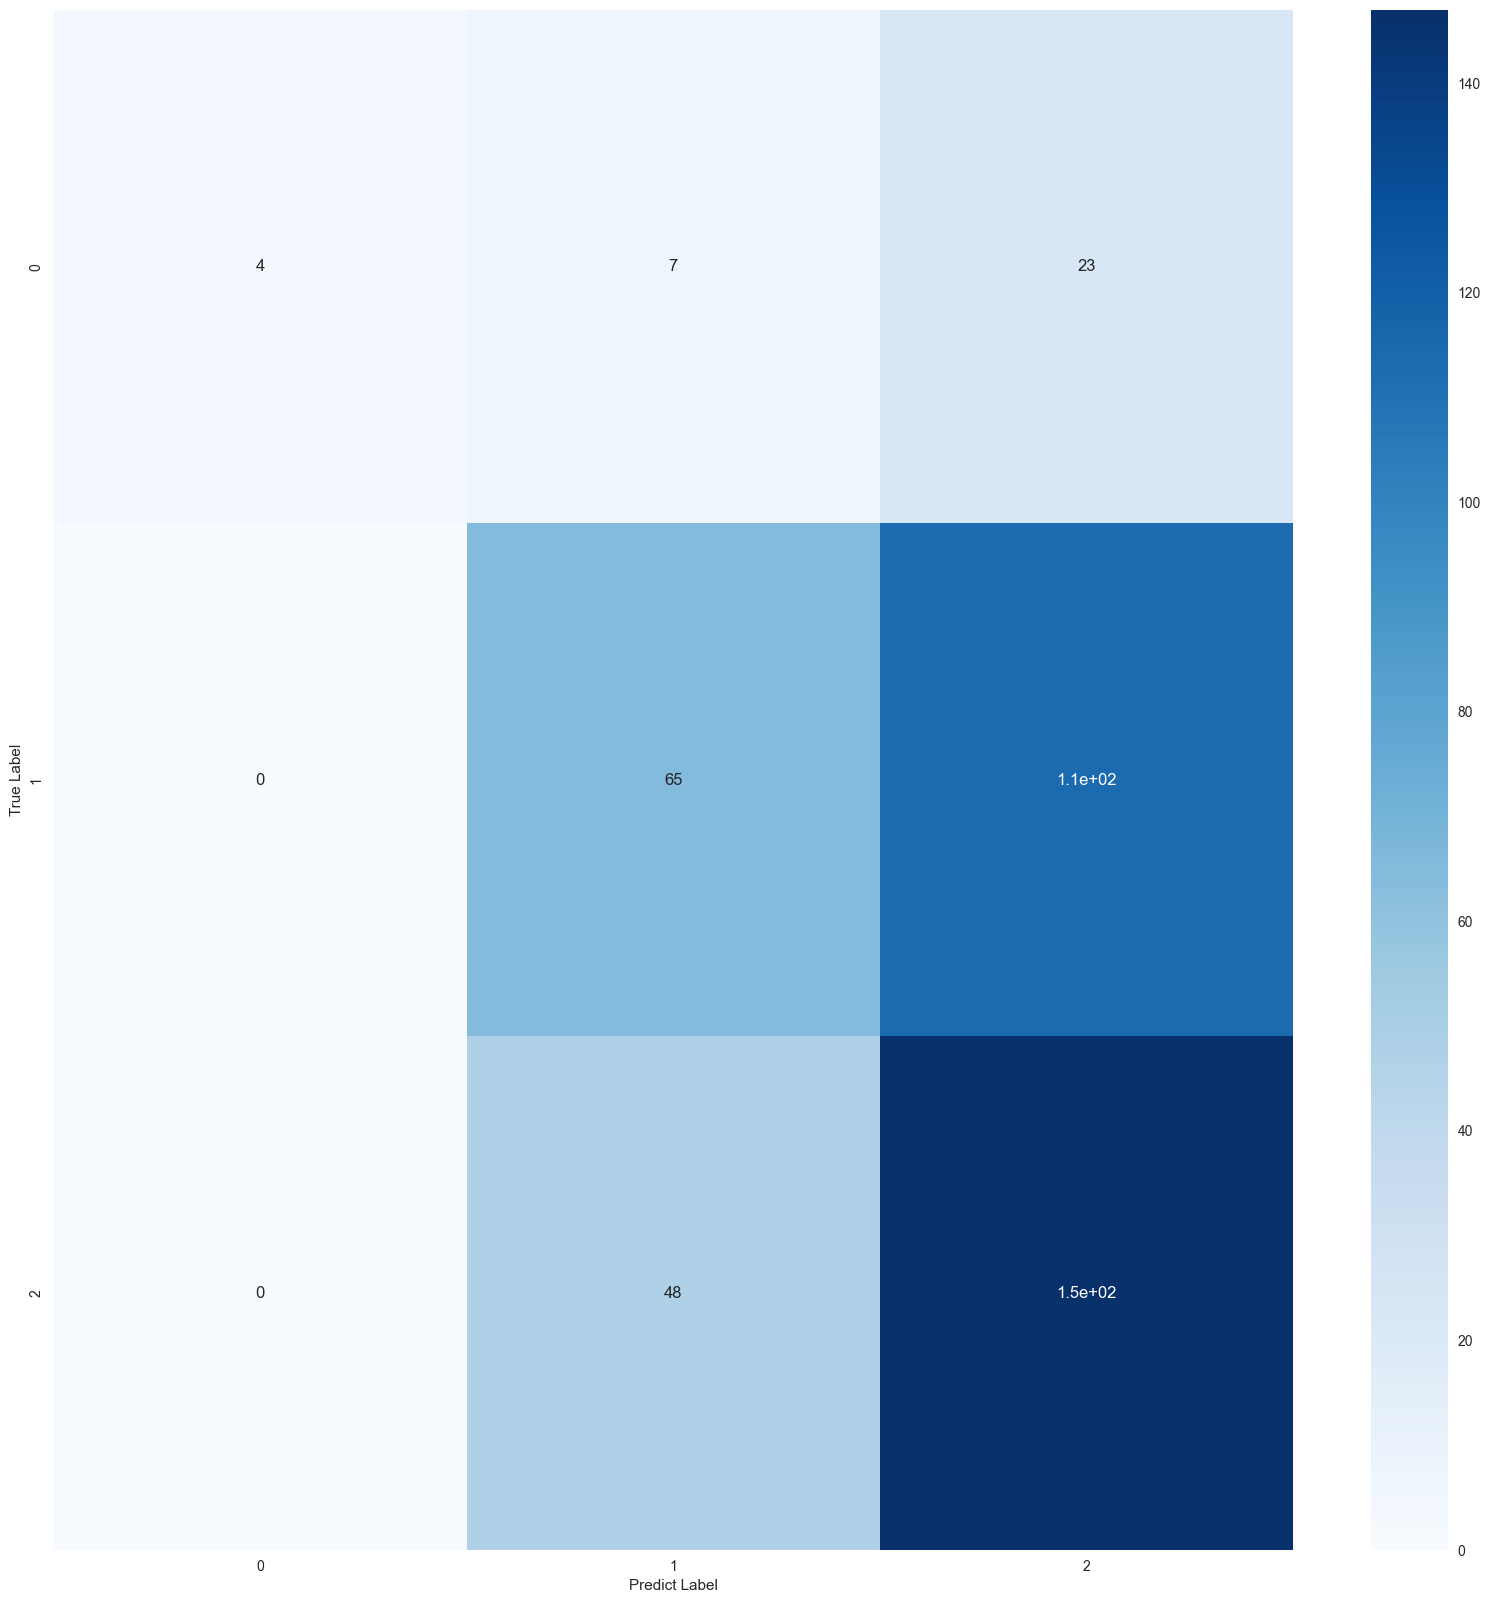

In [311]:
logr = LogisticRegression()
logr = logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

cf=metrics.confusion_matrix(y_test,y_pred).round(3)

print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=prediction_target),'\n')
print("Accuracy on train:  ",logr.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",logr.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [312]:
logr.intercept_

array([-0.17561017,  0.67926011, -0.50364995])

In [313]:
logr.coef_

array([[ 1.46971745e+00, -1.08913474e+00, -2.13265405e-01,
         2.72069143e-01,  1.16220759e-01, -9.85667891e-01,
         6.35357608e-01, -9.09761059e-01, -2.32476665e+00,
        -6.12804301e-01,  2.07116202e-01, -2.92068029e-02,
         5.17986309e-02,  1.45412181e-01],
       [-2.24434531e+00,  5.48991993e-01,  2.65177998e-02,
         8.49243480e-02,  4.89297087e-01,  2.14342731e-01,
         5.45814684e-02, -2.97553944e-02,  9.49603699e-01,
         4.66567025e-01, -3.97448300e-01,  1.30648924e-01,
        -2.21937228e-03, -1.80791242e-01],
       [ 7.74627854e-01,  5.40142750e-01,  1.86747606e-01,
        -3.56993491e-01, -6.05517846e-01,  7.71325161e-01,
        -6.89939077e-01,  9.39516454e-01,  1.37516295e+00,
         1.46237276e-01,  1.90332097e-01, -1.01442121e-01,
        -4.95792586e-02,  3.53790610e-02]])

In [324]:
np.exp(logr.coef_)

array([[4.34800645, 0.33650753, 0.80794168, 1.31267776, 1.12324381,
        0.37318989, 1.88769708, 0.40262041, 0.09780626, 0.54182928,
        1.23012551, 0.97121559, 1.05316365, 1.15651617],
       [0.10599691, 1.73150677, 1.02687253, 1.08863471, 1.63116925,
        1.23904724, 1.05609851, 0.97068294, 2.58468514, 1.59451087,
        0.67203269, 1.13956764, 0.99778309, 0.83460957],
       [2.1697845 , 1.71625184, 1.20532303, 0.69977705, 0.54579172,
        2.16263019, 0.50160663, 2.55874385, 3.95572125, 1.1574708 ,
        1.20965125, 0.90353347, 0.95162973, 1.03601235]])

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


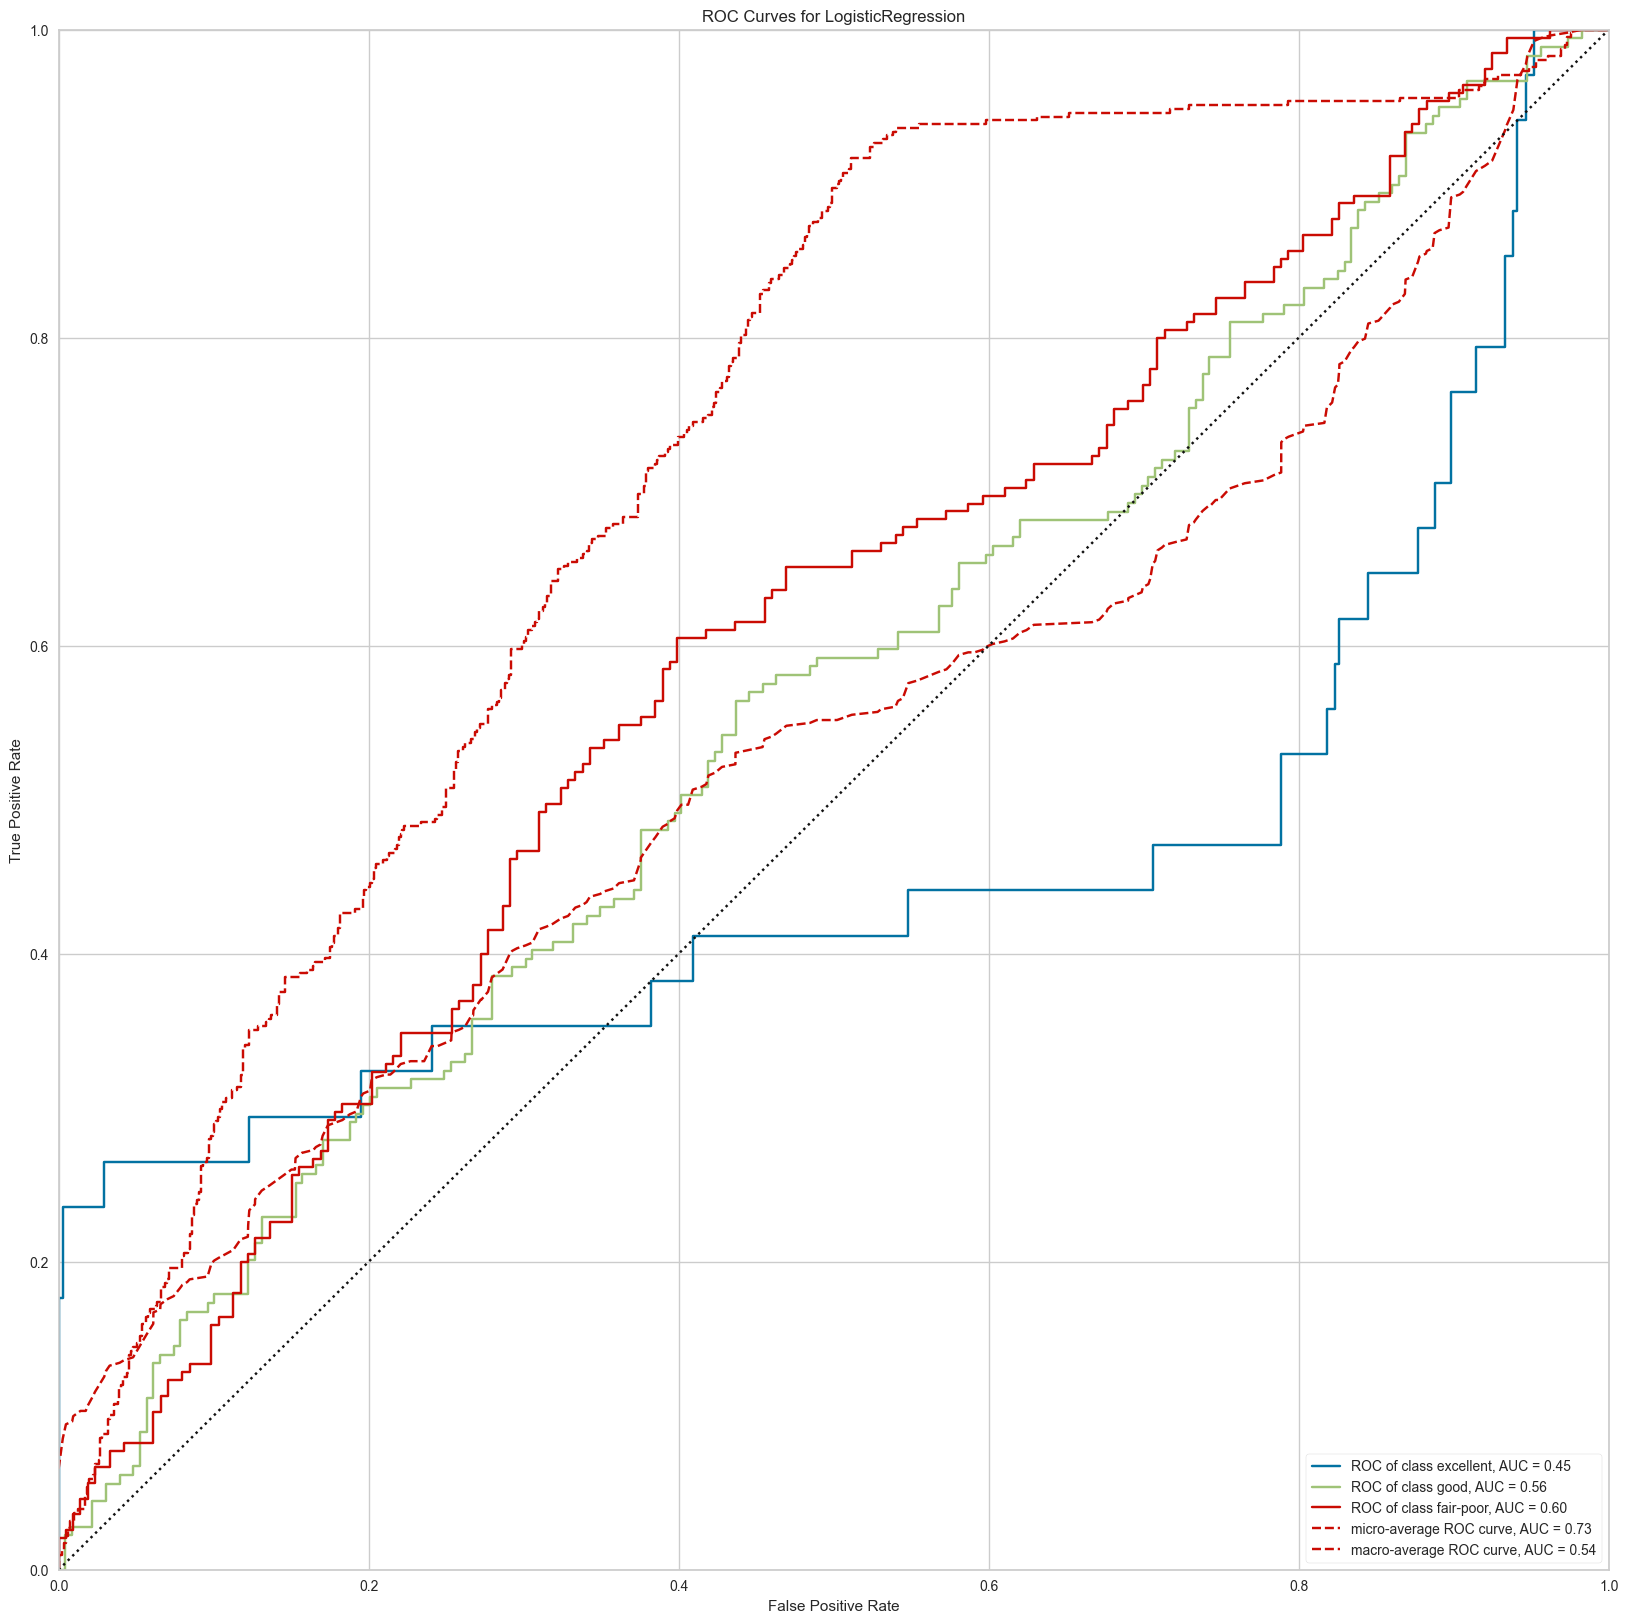

<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [315]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(logr, classes=prediction_target)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

In [316]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average='macro')

pred_prob = pd.DataFrame(logr.predict_proba(X_test))

auc = roc_auc_score(y_test, pred_prob, multi_class='ovr')
cfm = confusion_matrix(y_test, y_pred).ravel()

print('--- Logistic Regression Results ---')
print('Accuracy= ', accuracy)
print('Precision= ', precision)
print('Recall= ', recall)
print('F1 score= ', f1_score)
print('AUC= ', auc)
print('Confusion matrix= ', cfm)

--- Logistic Regression Results ---
Accuracy=  0.5294117647058824
Precision=  0.6864241001564945
Recall=  0.4115405680965984
F1 score=  0.41969587670728964
AUC=  0.5363775621394047
Confusion matrix=  [  4   7  23   0  65 114   0  48 147]


## KNN

Finding the best K

In [317]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 12)

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when

In [318]:
best_k

11

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report: 
               precision    recall  f1-score   support

   excellent       0.90      0.26      0.41        34
        good       0.61      0.63      0.62       179
   fair-poor       0.67      0.73      0.70       195

    accuracy                           0.65       408
   macro avg       0.73      0.54      0.58       408
weighted avg       0.66      0.65      0.64       408
 

Accuracy on train:   0.537 

Accuracy on test:  0.529 



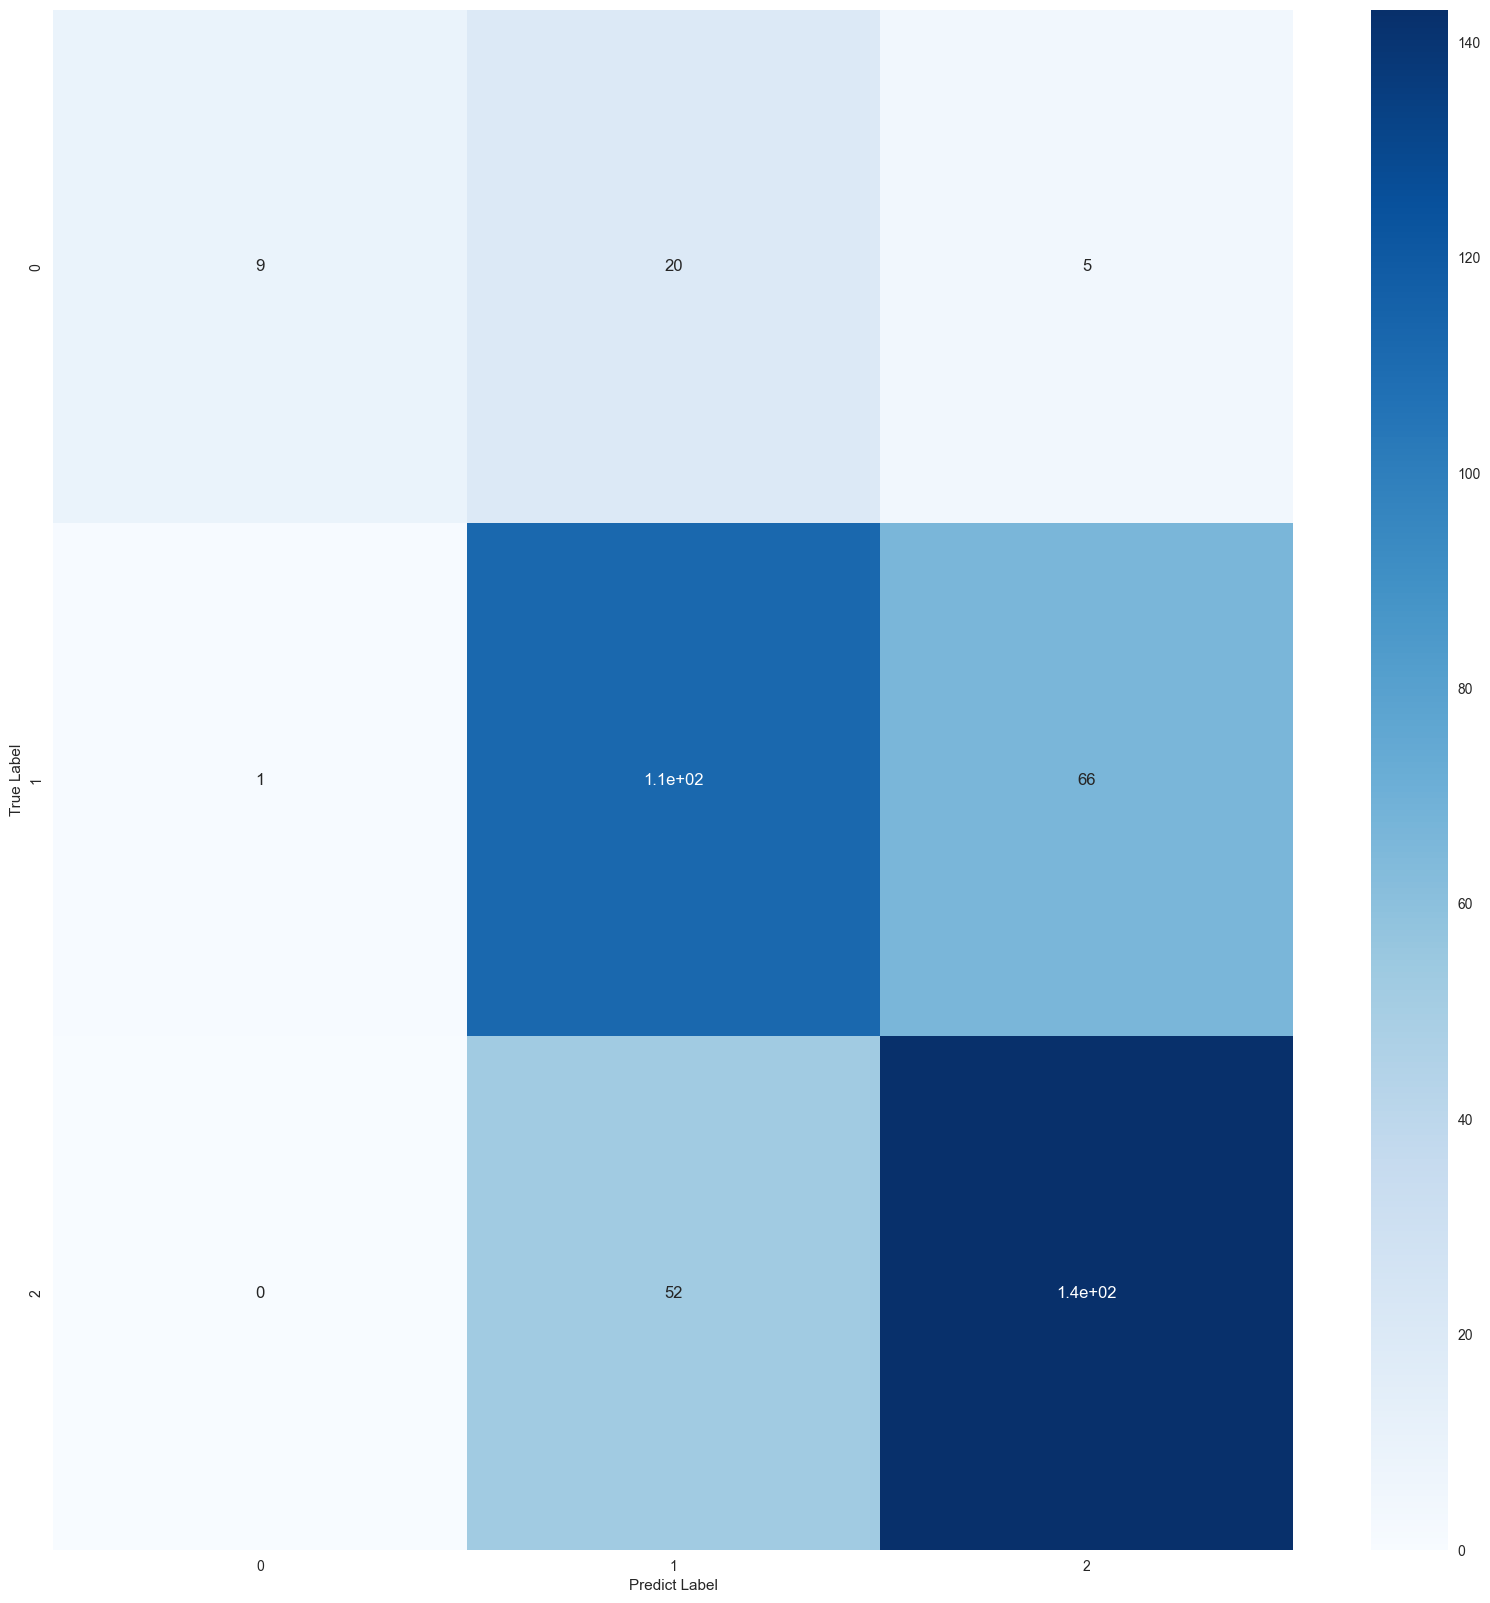

In [319]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cf=metrics.confusion_matrix(y_test,y_pred).round(3)

print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=prediction_target),'\n')
print("Accuracy on train:  ",logr.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",logr.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


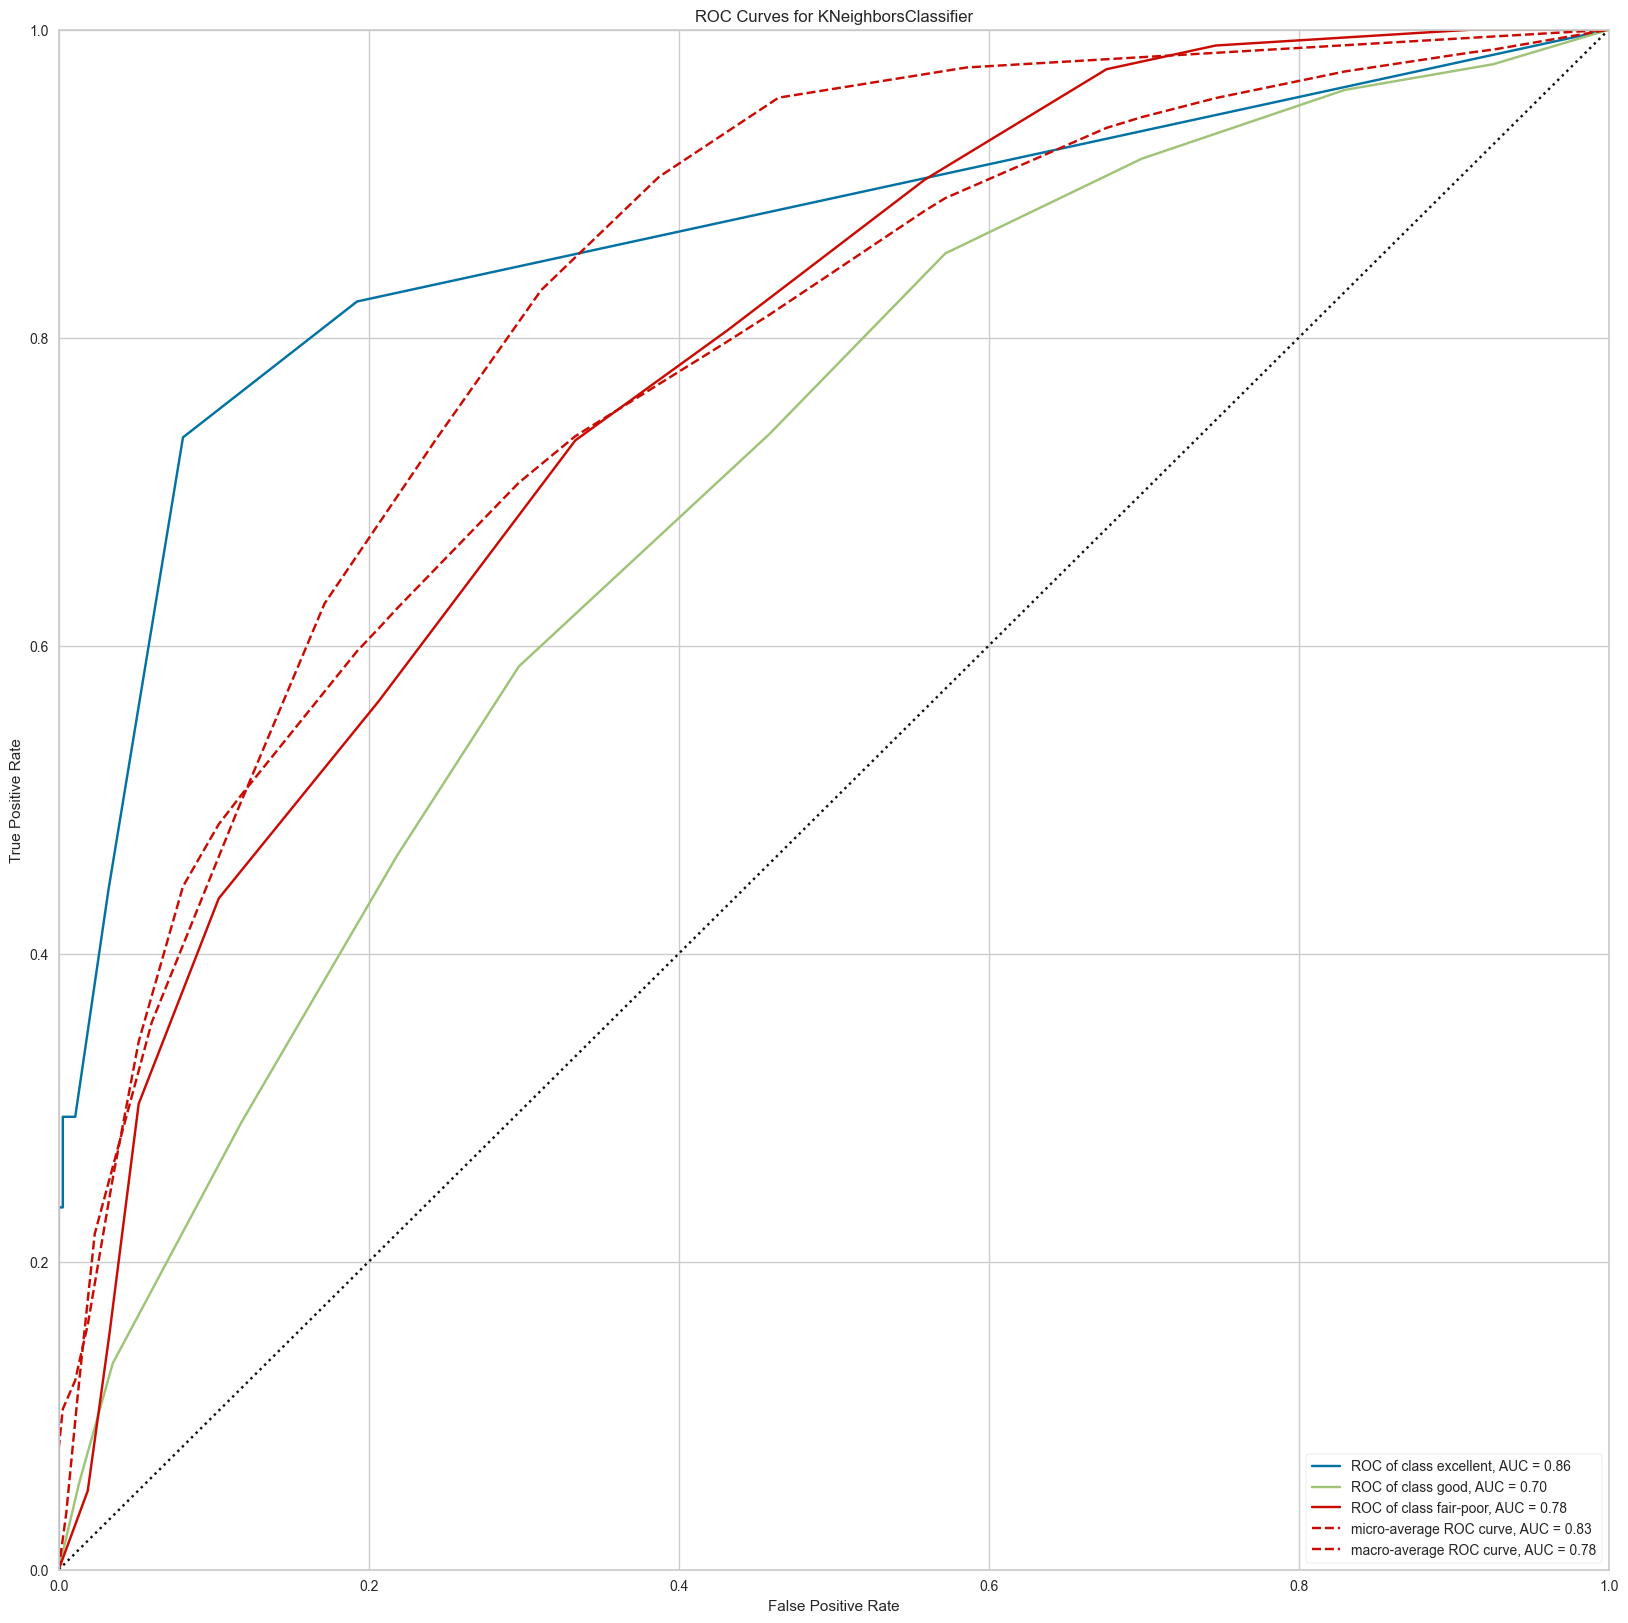

<AxesSubplot: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [320]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn, classes=prediction_target)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   